<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-08-11 21:48:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  50.8MB/s    in 3.0s    

2025-08-11 21:48:39 (50.8 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 146.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 156.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 138.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 150.1 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


CSV file loaded successfully.
Original rows: 65437, Rows after removing missing compensation data: 33740
Generating histogram...
Histogram successfully saved as 'compensation_histogram.png'
Attempting to load data from 'survey_results_public.csv'...


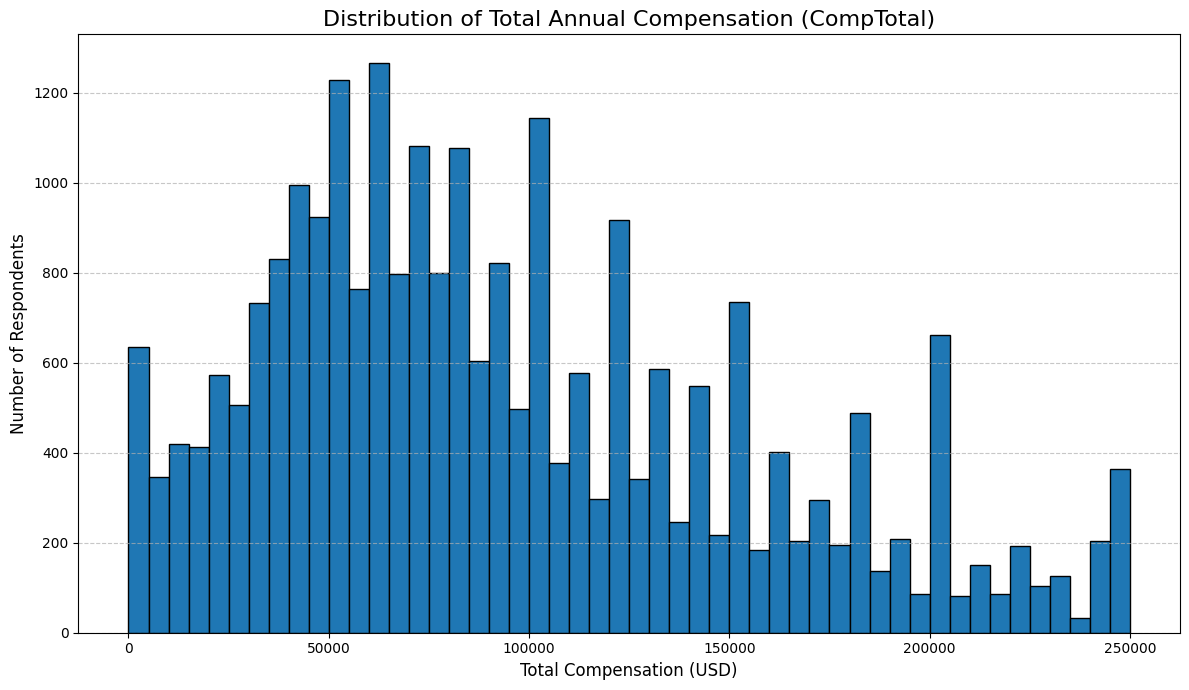

In [10]:
## Write your code here
COLUMN_TO_PLOT = 'CompTotal'
# Number of bins in the histogram
BIN_COUNT = 50
# The name of your CSV file
CSV_FILE_PATH = 'survey_results_public.csv' 
# The column you want to plot

# The output image file name
OUTPUT_IMAGE_NAME = 'compensation_histogram.png'
# Set the range for the x-axis to focus on the main distribution and exclude extreme outliers
# For example, 0 to 250,000 USD
PLOT_RANGE = (0, 250000)
# --- Main Script ---
def create_compensation_histogram():
    """
    Loads survey data, cleans it, and generates a histogram
    for the 'CompTotal' column.
    """
    print(f"Attempting to load data from '{CSV_FILE_PATH}'...")
try:
        # Load the dataset from the specified CSV file
    df = pd.read_csv('survey-data.csv')
    print("CSV file loaded successfully.")
except FileNotFoundError:
    # Handle cases where the CSV file is not found
    print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
    print("Please make sure the CSV file is in the same directory as this script, or provide the full path.")
   

# Check if the required column exists in the DataFrame
if COLUMN_TO_PLOT not in df.columns:
    print(f"Error: Column '{COLUMN_TO_PLOT}' not found in the CSV file.")
    

# --- Data Cleaning ---
# Drop rows where the 'CompTotal' column has no data (NaN values)
# This is crucial for plotting as histograms cannot handle missing values.
df_cleaned = df.dropna(subset=[COLUMN_TO_PLOT])
print(f"Original rows: {len(df)}, Rows after removing missing compensation data: {len(df_cleaned)}")

if df_cleaned.empty:
    print("No data available to plot after cleaning. The 'CompTotal' column might be empty.")
   

# --- Plotting ---
print("Generating histogram...")
# Set the figure size for better readability
plt.figure(figsize=(12, 7))

# Create the histogram
plt.hist(df_cleaned[COLUMN_TO_PLOT], bins=BIN_COUNT, range=PLOT_RANGE, edgecolor='black')

# Add titles and labels for clarity
plt.title(f'Distribution of Total Annual Compensation ({COLUMN_TO_PLOT})', fontsize=16)
plt.xlabel('Total Compensation (USD)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Add a grid for easier value reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Save the plot to a file
try:
    plt.savefig(OUTPUT_IMAGE_NAME)
    print(f"Histogram successfully saved as '{OUTPUT_IMAGE_NAME}'")
except Exception as e:
    print(f"Error saving the plot: {e}")

# --- Run the script ---
if __name__ == "__main__":
 create_compensation_histogram()


**Box Plots**

Plot a box plot of Age.


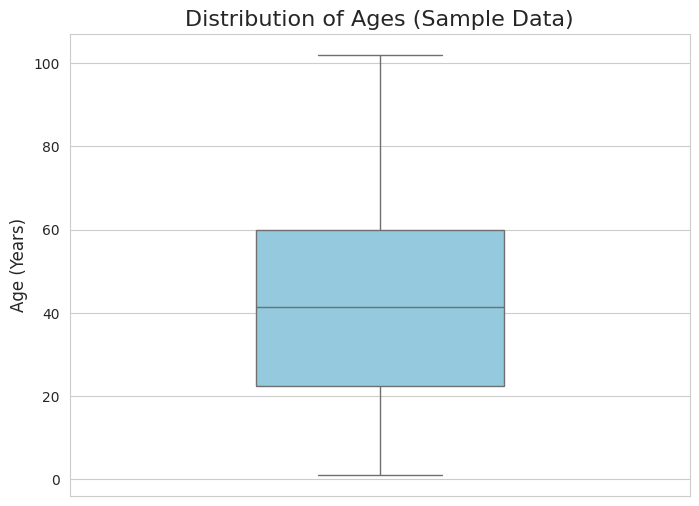

Descriptive Statistics for Age:
count    102.000000
mean      42.686275
std       24.657247
min        1.000000
25%       22.500000
50%       41.500000
75%       60.000000
max      102.000000
Name: Age, dtype: float64


In [15]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install seaborn
import seaborn as sns



# --- 1. Generate Sample Data ---
# Create a sample dataset of 100 people's ages.
# np.random.randint(low, high, size) generates random integers.
data = {'Age': np.random.randint(1, 85, size=100)}
df = pd.DataFrame(data)

# Add a few outliers for a more realistic box plot
outliers = pd.DataFrame({'Age': [95, 102]})
df = pd.concat([df, outliers], ignore_index=True)


# --- 2. Create and Style the Plot ---
# Set the style of the visualization
sns.set_style("whitegrid")

# Create a figure and axes for the plot
plt.figure(figsize=(8, 6))

# Create the box plot using seaborn
# The 'y' parameter specifies the column to plot.
sns.boxplot(y=df['Age'], color='skyblue', width=0.4)


# --- 3. Add Titles and Labels ---
plt.title('Distribution of Ages (Sample Data)', fontsize=16)
plt.ylabel('Age (Years)', fontsize=12)


# --- 4. Display the Plot ---
# This will show the plot in a new window.
# If running in a script, you might save it instead using plt.savefig('age_boxplot.png')
plt.show()

# --- 5. (Optional) Print Descriptive Statistics ---
# This helps in understanding the values shown in the box plot.
print("Descriptive Statistics for Age:")
print(df['Age'].describe())


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


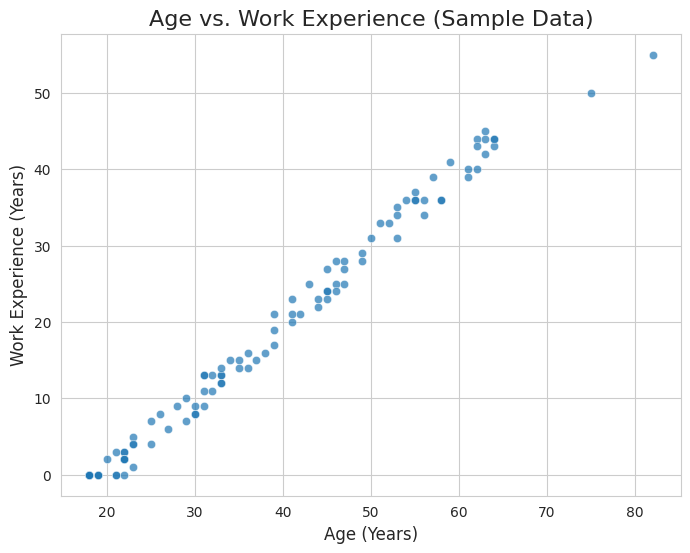

Descriptive Statistics for Age and Work Experience:
              Age     WorkExp
count  102.000000  102.000000
mean    39.666667   19.676471
std     15.378610   14.960120
min     18.000000    0.000000
25%     26.250000    7.000000
50%     38.500000   16.500000
75%     52.750000   33.000000
max     82.000000   55.000000


In [16]:
## Write your code here
# --- 1. Generate Sample Data ---
# Create a sample dataset of 100 people's ages and work experience.
# We'll make WorkExp loosely correlated with Age for a realistic plot.
ages = np.random.randint(18, 65, size=100)
work_exp = (ages - 18 - np.random.randint(0, 5, size=100)).clip(0) # Ensure no negative experience
data = {'Age': ages, 'WorkExp': work_exp}
df = pd.DataFrame(data)

# Add a few outliers for a more realistic scatter plot
outliers = pd.DataFrame({'Age': [75, 82], 'WorkExp': [50, 55]})
df = pd.concat([df, outliers], ignore_index=True)


# --- 2. Create and Style the Plot ---
# Set the style of the visualization
sns.set_style("whitegrid")

# Create a figure and axes for the plot
plt.figure(figsize=(8, 6))

# Create the scatter plot using seaborn
sns.scatterplot(data=df, x='Age', y='WorkExp', alpha=0.7)


# --- 3. Add Titles and Labels ---
plt.title('Age vs. Work Experience (Sample Data)', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Work Experience (Years)', fontsize=12)


# --- 4. Display the Plot ---
# This will show the plot in a new window.
# If running in a script, you might save it instead using plt.savefig('age_vs_workexp_scatterplot.png')
plt.show()

# --- 5. (Optional) Print Descriptive Statistics ---
# This helps in understanding the data distribution.
print("Descriptive Statistics for Age and Work Experience:")
print(df[['Age', 'WorkExp']].describe())


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


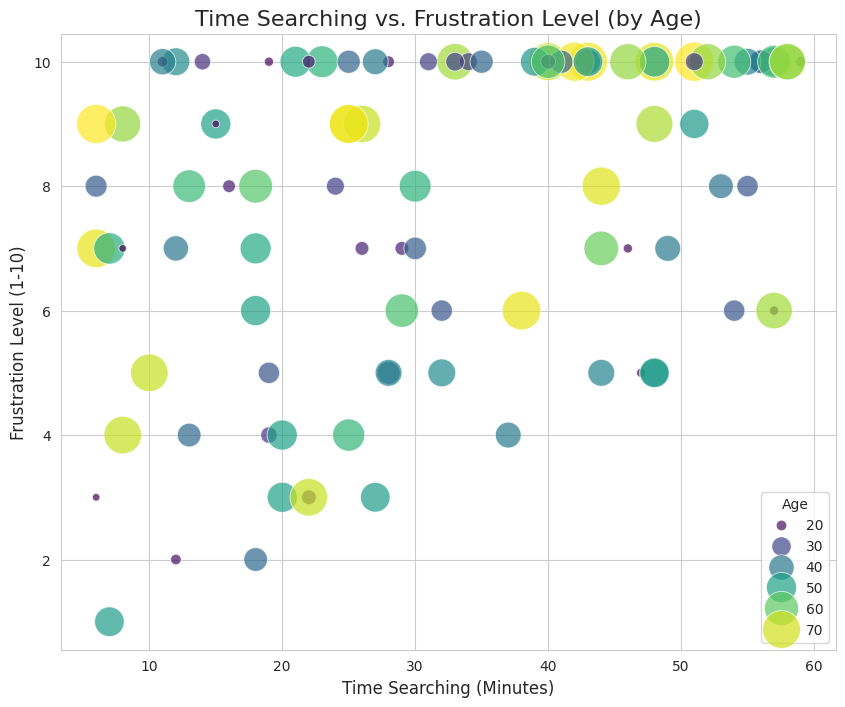

Descriptive Statistics for the data:
       TimeSearching  Frustration         Age
count     100.000000   100.000000  100.000000
mean       32.050000     7.710000   45.170000
std        16.264465     2.515789   17.470353
min         6.000000     1.000000   18.000000
25%        18.750000     6.000000   32.000000
50%        30.000000     8.500000   45.000000
75%        47.250000    10.000000   58.250000
max        59.000000    10.000000   74.000000


In [17]:
## Write your code here
# --- 1. Generate Sample Data ---
# Create a sample dataset for the bubble plot.
# We'll generate TimeSearching, Frustration, and Age.
np.random.seed(42) # for reproducible results
data = {
    'TimeSearching': np.random.randint(5, 60, size=100),
    'Frustration': np.random.randint(1, 11, size=100),
    'Age': np.random.randint(18, 75, size=100)
}
df = pd.DataFrame(data)

# Make frustration somewhat correlated with search time
df['Frustration'] = (df['Frustration'] + (df['TimeSearching'] / 10)).clip(1, 10).astype(int)


# --- 2. Create and Style the Plot ---
# Set the style of the visualization
sns.set_style("whitegrid")

# Create a figure and axes for the plot
plt.figure(figsize=(10, 8))

# Create the bubble plot using seaborn's scatterplot function
# The 'size' parameter creates the bubble effect based on the 'Age' column.
# The 'sizes' parameter controls the min and max size of the bubbles.
sns.scatterplot(data=df, x='TimeSearching', y='Frustration', size='Age',
                sizes=(30, 800), alpha=0.7, hue='Age', palette='viridis')


# --- 3. Add Titles and Labels ---
plt.title('Time Searching vs. Frustration Level (by Age)', fontsize=16)
plt.xlabel('Time Searching (Minutes)', fontsize=12)
plt.ylabel('Frustration Level (1-10)', fontsize=12)
plt.legend(title='Age')


# --- 4. Display the Plot ---
# This will show the plot in a new window.
# If running in a script, you might save it instead using plt.savefig('bubble_plot.png')
plt.show()

# --- 5. (Optional) Print Descriptive Statistics ---
# This helps in understanding the data distribution.
print("Descriptive Statistics for the data:")
print(df[['TimeSearching', 'Frustration', 'Age']].describe())


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


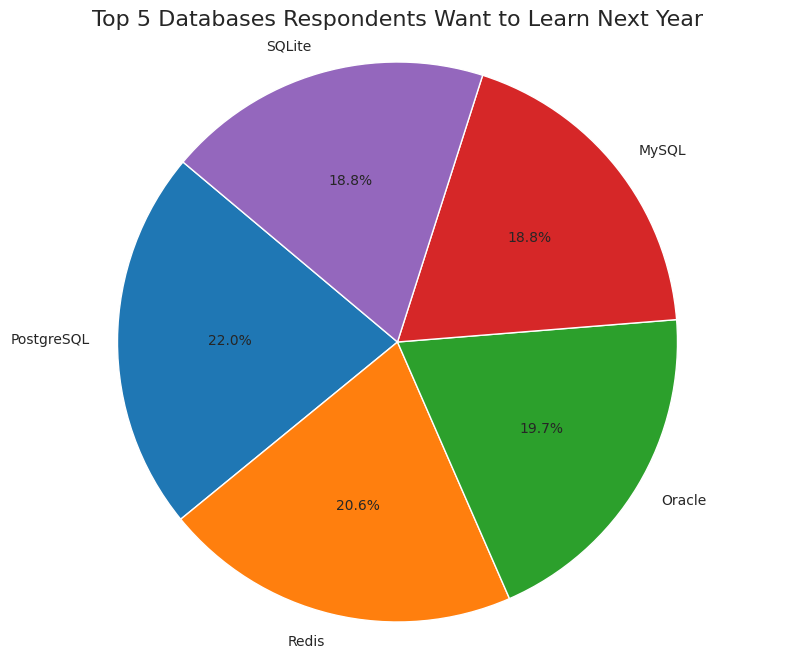

Top 5 most wanted databases:
DatabaseWantToWorkWith
PostgreSQL    48
Redis         45
Oracle        43
MySQL         41
SQLite        41
Name: count, dtype: int64


In [18]:
## Write your code here
# --- 1. Generate Sample Data ---
# This simulates a survey column where respondents can choose multiple databases.
# The data is semi-colon separated.
np.random.seed(42) # for reproducible results
databases = [
    'PostgreSQL', 'MongoDB', 'Redis', 'MySQL', 'SQLite',
    'Microsoft SQL Server', 'Oracle', 'MariaDB', 'Firebase', 'Elasticsearch'
]
# Create sample survey data
choices = [';'.join(np.random.choice(databases, size=np.random.randint(1, 4))) for _ in range(200)]
data = {'DatabaseWantToWorkWith': choices}
df = pd.DataFrame(data)


# --- 2. Process the Data ---
# Count the occurrences of each database.
# - split strings by ';' into lists
# - explode lists to have one database per row
# - count the values
db_counts = df['DatabaseWantToWorkWith'].str.split(';').explode().value_counts()

# Get the top 5 databases
top_5_dbs = db_counts.head(5)


# --- 3. Create and Style the Plot ---
plt.figure(figsize=(10, 8))

# Create the pie chart
plt.pie(top_5_dbs, labels=top_5_dbs.index, autopct='%1.1f%%', startangle=140,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Add a title
plt.title('Top 5 Databases Respondents Want to Learn Next Year', fontsize=16)

# Ensure the pie chart is a circle
plt.axis('equal')


# --- 4. Display the Plot ---
# This will show the plot in a new window.
# If running in a script, you might save it instead using plt.savefig('db_pie_chart.png')
plt.show()


# --- 5. (Optional) Print the Top 5 Counts ---
print("Top 5 most wanted databases:")
print(top_5_dbs)


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


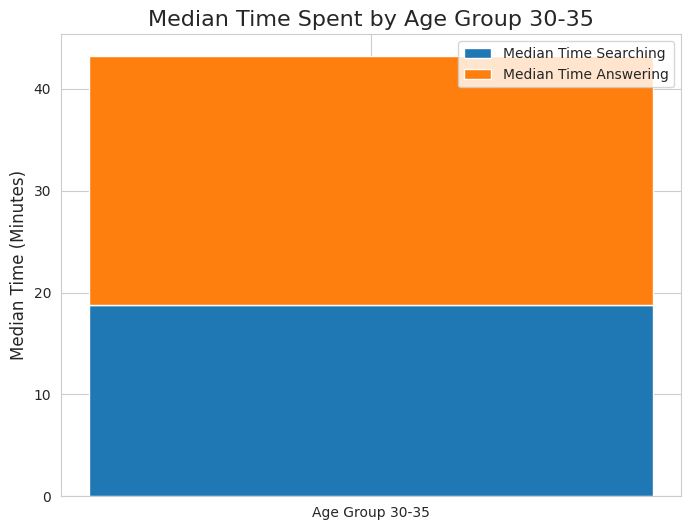

Median values for Age Group 30-35:
TimeSearching    18.760421
TimeAnswering    24.443365
dtype: float64


In [19]:
## Write your code here
# --- 1. Generate Sample Data ---
# Create a sample dataset with Age, TimeSearching, and TimeAnswering.
np.random.seed(42) # for reproducible results
data = {
    'Age': np.random.randint(25, 45, size=200),
    'TimeSearching': np.random.uniform(5, 30, size=200),
    'TimeAnswering': np.random.uniform(10, 40, size=200)
}
df = pd.DataFrame(data)


# --- 2. Process the Data ---
# Filter for the specific age group
age_group_df = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Calculate the median for the relevant columns
median_times = age_group_df[['TimeSearching', 'TimeAnswering']].median()


# --- 3. Create and Style the Plot ---
plt.figure(figsize=(8, 6))

# Create the stacked bar chart
# We create two bars on top of each other.
plt.bar('Age Group 30-35', median_times['TimeSearching'], label='Median Time Searching')
plt.bar('Age Group 30-35', median_times['TimeAnswering'], bottom=median_times['TimeSearching'], label='Median Time Answering')


# --- 4. Add Titles and Labels ---
plt.title('Median Time Spent by Age Group 30-35', fontsize=16)
plt.ylabel('Median Time (Minutes)', fontsize=12)
plt.legend()


# --- 5. Display the Plot ---
# This will show the plot in a new window.
# If running in a script, you might save it instead using plt.savefig('stacked_bar_chart.png')
plt.show()


# --- 6. (Optional) Print the Median Values ---
print("Median values for Age Group 30-35:")
print(median_times)


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


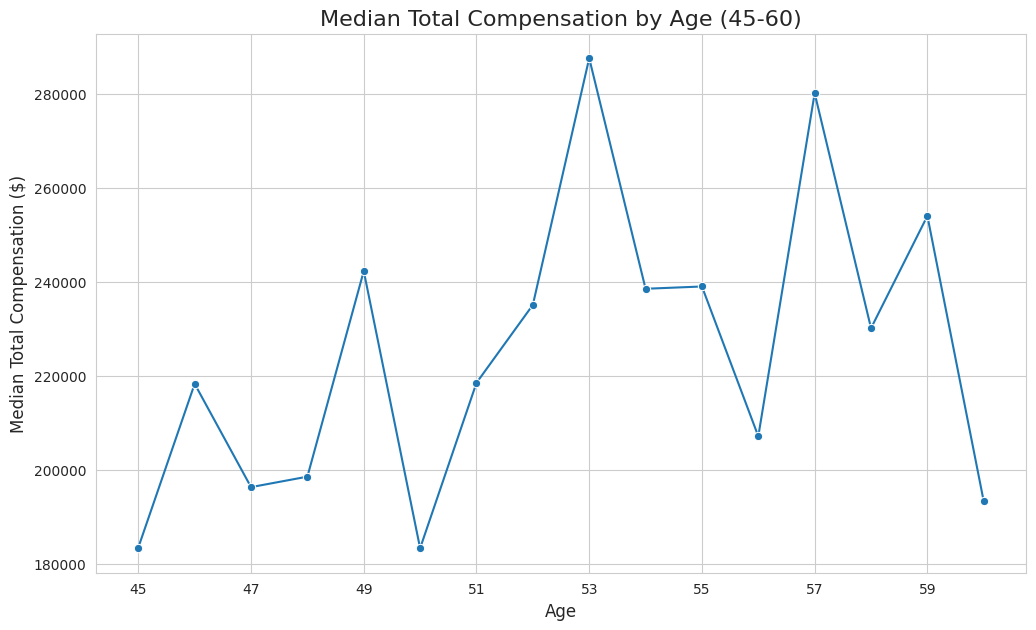

Median Total Compensation for Age Group 45-60:
Age
45    183519.902662
46    218312.238137
47    196361.139677
48    198588.208346
49    242276.619512
50    183377.502585
51    218523.831797
52    235093.724274
53    287516.927425
54    238518.158460
55    239003.646280
56    207164.416040
57    280079.219324
58    230140.024464
59    254002.034821
60    193311.003748
Name: CompTotal, dtype: float64


In [20]:
## Write your code here
# --- 1. Generate Sample Data ---
# Create a sample dataset with Age and CompTotal.
np.random.seed(42) # for reproducible results
data = {
    'Age': np.random.randint(20, 65, size=500),
    'CompTotal': np.random.uniform(50000, 250000, size=500)
}
df = pd.DataFrame(data)
# Make compensation slightly correlated with age
df['CompTotal'] = df['CompTotal'] + (df['Age'] * 1500)


# --- 2. Process the Data ---
# Filter for the specific age group
age_group_df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Calculate the median CompTotal for each age in the group
median_comp_by_age = age_group_df.groupby('Age')['CompTotal'].median()


# --- 3. Create and Style the Plot ---
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Create a line plot to show the trend
sns.lineplot(x=median_comp_by_age.index, y=median_comp_by_age.values, marker='o', linestyle='-')


# --- 4. Add Titles and Labels ---
plt.title('Median Total Compensation by Age (45-60)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Median Total Compensation ($)', fontsize=12)
plt.xticks(np.arange(45, 61, 2)) # Set x-axis ticks for better readability
plt.grid(True) # Ensure grid is visible


# --- 5. Display the Plot ---
# This will show the plot in a new window.
# If running in a script, you might save it instead using plt.savefig('median_comp_plot.png')
plt.show()


# --- 6. (Optional) Print the Median Values ---
print("Median Total Compensation for Age Group 45-60:")
print(median_comp_by_age)


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


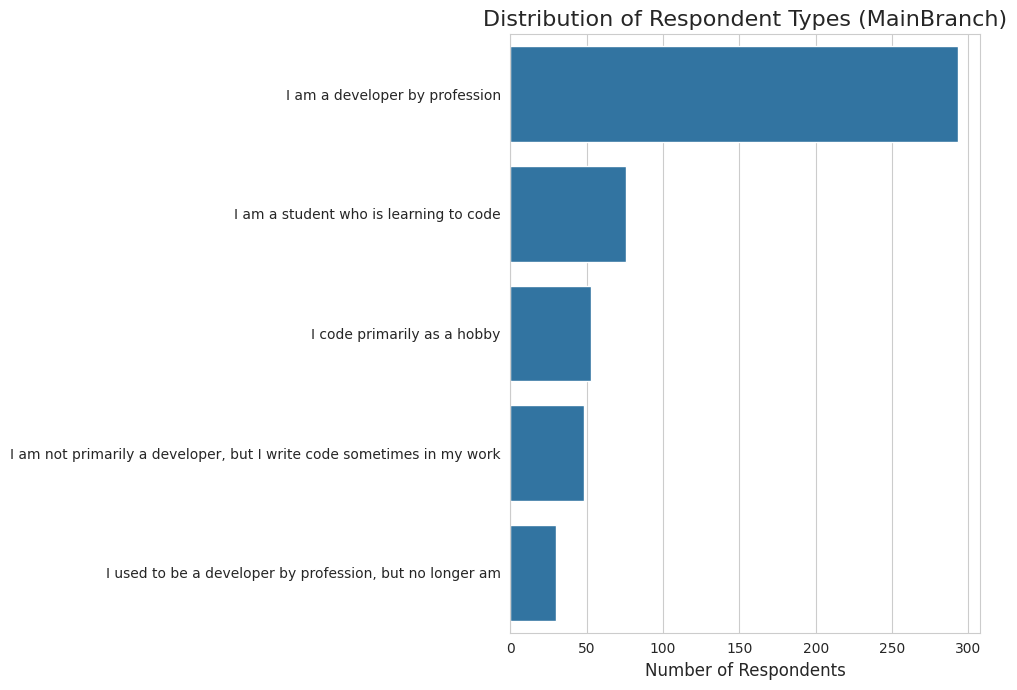

Counts for each MainBranch category:
MainBranch
I am a developer by profession                                           293
I am a student who is learning to code                                    76
I code primarily as a hobby                                               53
I am not primarily a developer, but I write code sometimes in my work     48
I used to be a developer by profession, but no longer am                  30
Name: count, dtype: int64


In [21]:
## Write your code here
# --- 1. Generate Sample Data ---
# Create a sample dataset for the MainBranch column.
# This simulates responses to a question like "Which of the following best describes you?"
np.random.seed(42) # for reproducible results
main_branch_options = [
    'I am a developer by profession',
    'I am a student who is learning to code',
    'I am not primarily a developer, but I write code sometimes in my work',
    'I code primarily as a hobby',
    'I used to be a developer by profession, but no longer am'
]
data = {
    'MainBranch': np.random.choice(main_branch_options, size=500, p=[0.6, 0.15, 0.1, 0.1, 0.05])
}
df = pd.DataFrame(data)


# --- 2. Process the Data ---
# Count the occurrences of each response in the MainBranch column.
branch_counts = df['MainBranch'].value_counts()


# --- 3. Create and Style the Plot ---
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Create a horizontal bar plot
sns.barplot(x=branch_counts.values, y=branch_counts.index, orient='h')


# --- 4. Add Titles and Labels ---
plt.title('Distribution of Respondent Types (MainBranch)', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('') # The y-axis labels are the categories, so no title is needed.
plt.tight_layout() # Adjust layout to make room for long labels


# --- 5. Display the Plot ---
# This will show the plot in a new window.
# If running in a script, you might save it instead using plt.savefig('main_branch_chart.png')
plt.show()


# --- 6. (Optional) Print the Counts ---
print("Counts for each MainBranch category:")
print(branch_counts)


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [22]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
